In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

In [ ]:
os.chdir("{paste_path_to_dir}")

In [5]:
df = pd.read_csv("01_data_ingestion/Music_Classification_Dataset.csv")

In [6]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Genre,Name,Artist
0,0.466,0.833,7,-4.215,1,0.3040,0.0266,0.000000,0.0327,0.661,...,audio_features,59WN2psjkt1tyaxjspN8fp,spotify:track:59WN2psjkt1tyaxjspN8fp,https://api.spotify.com/v1/tracks/59WN2psjkt1t...,https://api.spotify.com/v1/audio-analysis/59WN...,313573,4,Rock,Killing In The Name,Rage Against The Machine
1,0.634,0.630,1,-8.277,0,0.0310,0.4470,0.039000,0.1700,0.489,...,audio_features,6H3kDe7CGoWYBabAeVWGiD,spotify:track:6H3kDe7CGoWYBabAeVWGiD,https://api.spotify.com/v1/tracks/6H3kDe7CGoWY...,https://api.spotify.com/v1/audio-analysis/6H3k...,270773,4,Rock,Gimme Shelter,The Rolling Stones
2,0.310,0.700,9,-5.678,1,0.0470,0.0110,0.009650,0.0828,0.763,...,audio_features,08mG3Y1vljYA6bvDt4Wqkj,spotify:track:08mG3Y1vljYA6bvDt4Wqkj,https://api.spotify.com/v1/tracks/08mG3Y1vljYA...,https://api.spotify.com/v1/audio-analysis/08mG...,255493,4,Rock,Back In Black,AC/DC
3,0.515,0.430,7,-9.935,1,0.0372,0.0097,0.000133,0.1290,0.104,...,audio_features,70LcF31zb1H0PyJoS1Sx1r,spotify:track:70LcF31zb1H0PyJoS1Sx1r,https://api.spotify.com/v1/tracks/70LcF31zb1H0...,https://api.spotify.com/v1/audio-analysis/70Lc...,238640,4,Rock,Creep,Radiohead
4,0.412,0.902,9,-11.600,1,0.4050,0.0484,0.131000,0.4050,0.422,...,audio_features,0hCB0YR03f6AmQaHbwWDe8,spotify:track:0hCB0YR03f6AmQaHbwWDe8,https://api.spotify.com/v1/tracks/0hCB0YR03f6A...,https://api.spotify.com/v1/audio-analysis/0hCB...,333893,4,Rock,Whole Lotta Love - 1990 Remaster,Led Zeppelin


In [7]:
df.shape

(902, 21)

In [8]:
# Creating Target variable
df["Target"] = np.where(df["Genre"] == "Rock", 1,0)

In [9]:
df["Target"].value_counts()

0    702
1    200
Name: Target, dtype: int64

## Data Cleaning

In [10]:
# There are a bunch of songs with the same ids. Remove songs with same ids since it should be unique
df['id'].value_counts()

2Ch7LmS7r2Gy2kc64wv3Bz    4
6G1Mz5yMgn0ydOlIvTrZ65    4
1xzi1Jcr7mEi9K2RfzLOqS    3
2WigMwGJysIh9fRnSJvpjn    3
35ovElsgyAtQwYPYnZJECg    3
                         ..
4uUG5RXrOk84mYEfFvj3cK    1
3nqQXoyQOWXiESFLlDF1hG    1
10xV5l9nhLvFpR8mqzs0bL    1
4h9wh7iOZ0GGn8QVp4RAOB    1
0fGsBRR1Am2H5nIQx9nFCT    1
Name: id, Length: 850, dtype: int64

In [11]:
# Remove duplicate songs
df = df.drop_duplicates(subset='id', keep="first")

In [12]:
# Remove columns with genre as that is a leaky variable
df.drop(['Genre'], axis=1, inplace= True)

In [13]:
# Drop columns that are not required for modelling
df.drop(["type","id","uri","track_href","analysis_url","Name","Artist"], axis=1, inplace=True)

In [14]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'Target'],
      dtype='object')

In [15]:
# Checking for NAs
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
Target              0
dtype: int64

In [16]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Target
0,0.466,0.833,7,-4.215,1,0.3040,0.0266,0.000000,0.0327,0.661,88.785,313573,4,1
1,0.634,0.630,1,-8.277,0,0.0310,0.4470,0.039000,0.1700,0.489,118.628,270773,4,1
2,0.310,0.700,9,-5.678,1,0.0470,0.0110,0.009650,0.0828,0.763,188.386,255493,4,1
3,0.515,0.430,7,-9.935,1,0.0372,0.0097,0.000133,0.1290,0.104,91.844,238640,4,1
4,0.412,0.902,9,-11.600,1,0.4050,0.0484,0.131000,0.4050,0.422,89.740,333893,4,1


## EDA

In [17]:
Y = df["Target"]

In [18]:
df.drop(["Target"], axis=1, inplace=True)

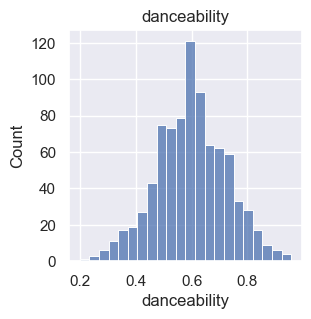

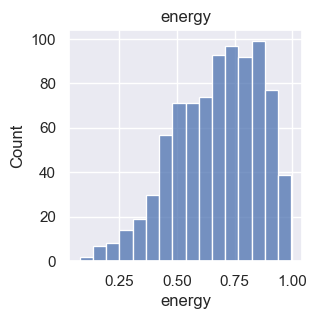

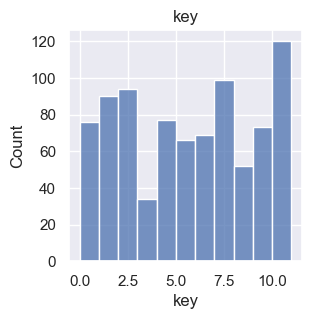

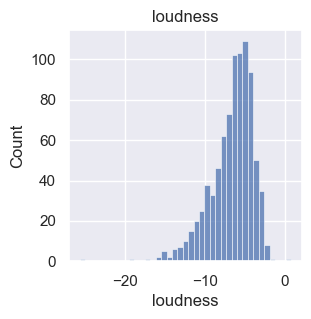

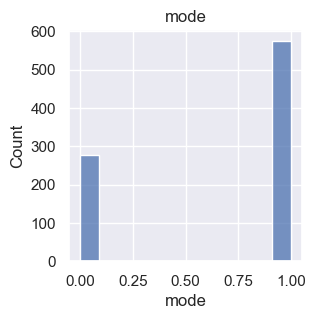

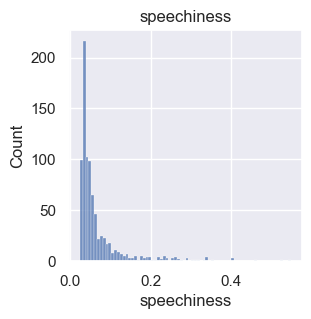

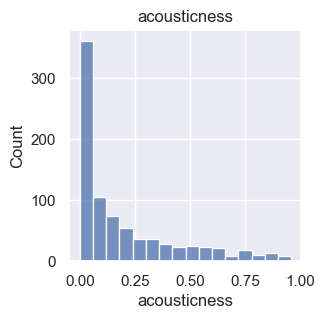

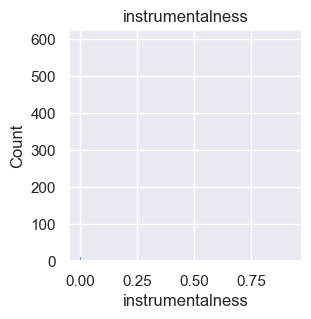

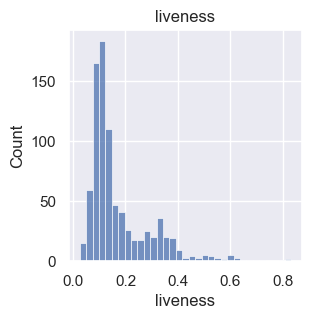

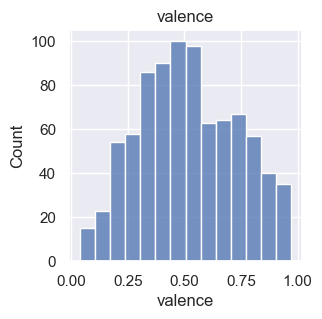

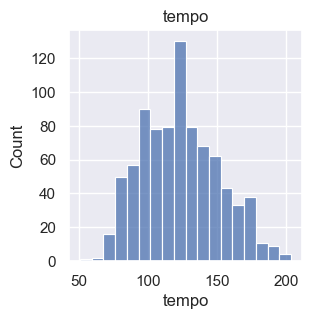

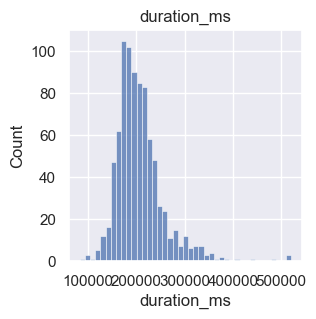

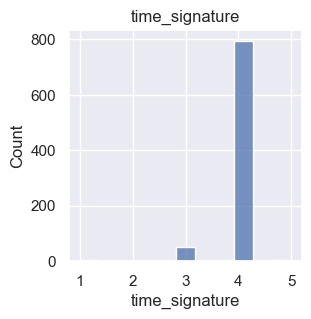

In [19]:
sns.set(rc={'figure.figsize':(3,3)})
for i in df.columns:
    plt.figure(i)
    ax = sns.histplot(df[i])
    ax.set_title(i)
    plt.show()

<AxesSubplot: >

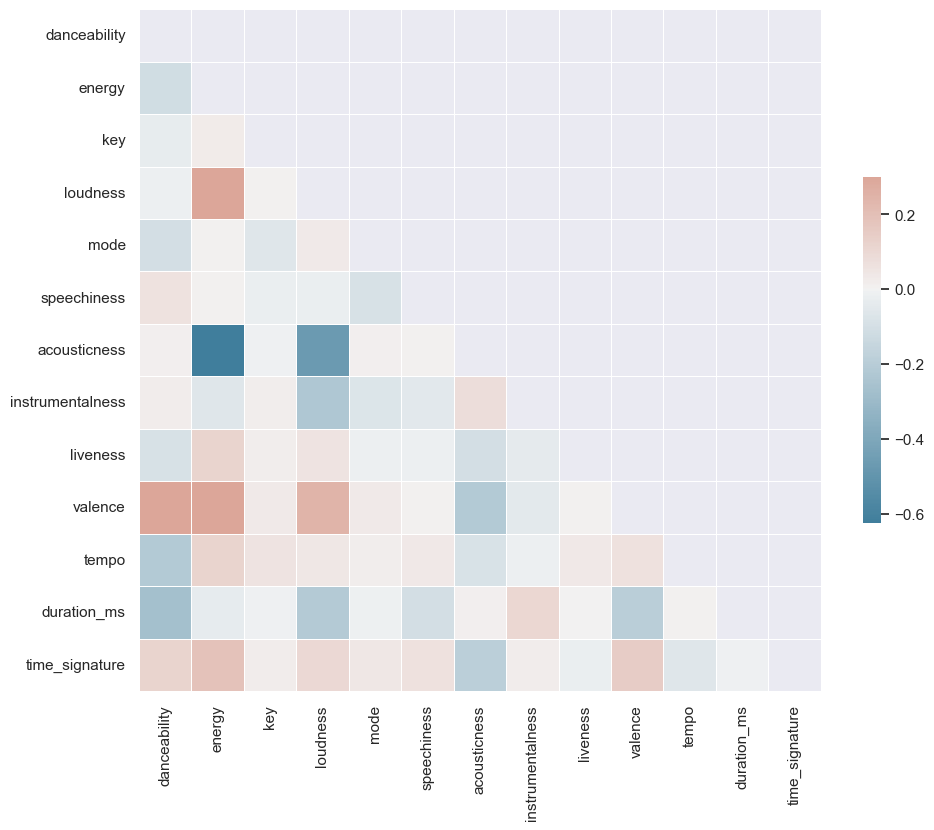

In [20]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Data Pre Processing

In [21]:
X = df

In [22]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Data Modelling

In [23]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [24]:
def print_metrics(X, y, model):
    
    y_pred = model.predict(X)
    print('------------------')
    print('Accuracy score = ',accuracy_score(y, y_pred.round()))
    print('Precision score = ',precision_score(y, y_pred.round()))
    print('Recall score = ',recall_score(y, y_pred.round()))
    print('F1 score = ' ,f1_score(y, y_pred.round()))
    print('ROC-AUC score = ',roc_auc_score(y, y_pred))

In [25]:
print('Metrics for test data set: ')
print_metrics(X_test, y_test, decision_tree_model)

Metrics for test data set: 
------------------
Accuracy score =  0.7941176470588235
Precision score =  0.55
Recall score =  0.5641025641025641
F1 score =  0.5569620253164557
ROC-AUC score =  0.7133489919749462


In [26]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [27]:
print('Metrics for test data set: ')
print_metrics(X_test, y_test, rf_model)

Metrics for test data set: 
------------------
Accuracy score =  0.8588235294117647
Precision score =  0.8947368421052632
Recall score =  0.4358974358974359
F1 score =  0.5862068965517242
ROC-AUC score =  0.7103151301624584


## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print('Metrics for test data set: ')
print_metrics(X_test, y_test, best_clf)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s


In [ ]:
# Feature importance


## Saving Model

In [56]:
from sklearn.feature_extraction import DictVectorizer
import pickle
dv =  DictVectorizer(sparse=False)
train_dicts = X_train.reset_index(drop=True).to_dict(orient='records')

output_file = f'model_v1'
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,best_clf), f_out)